In [32]:
# Importação dos pacotes python
import pandas as pd
import matplotlib.pyplot as mlp
import numpy as np

In [33]:
# Carregando o arquivo
arquivo = "dados_compras.json"
base = pd.read_json(arquivo, orient = "records")
base.head()# retorna as 5 primeiras linhas da base de dados

,Login,Idade,Sexo,Item ID,Nome do Item,Valor
0,Aelalis34,38,Masculino,165,Bone Crushing Silver Skewer,3.37
1,Eolo46,21,Masculino,119,"Stormbringer, Dark Blade of Ending Misery",2.32
2,Assastnya25,34,Masculino,174,Primitive Blade,2.46
3,Pheusrical25,21,Masculino,92,Final Critic,1.36
4,Aela59,23,Masculino,63,Stormfury Mace,1.27


## Informações Sobre os Consumidores

In [34]:
#localizar se nos dados há mais de uma venda por consumidor
dados_demo = base.loc[:,["Login","Sexo","Idade"]] #retornar todas as linhas das colunas selecionadas
dados_demo = dados_demo.drop_duplicates()#retira todas os usuário que tiveram mais de uma compra
dados_demo.shape #tamanho da nova amostra

(573, 3)

In [35]:
dados_demo.drop()#dados da nova amostra

,Login,Sexo,Idade
0,Aelalis34,Masculino,38
1,Eolo46,Masculino,21
2,Assastnya25,Masculino,34
3,Pheusrical25,Masculino,21
4,Aela59,Masculino,23


In [63]:
total_usuários = dados_demo["Login"].count()
quantidade_vendas = base["Valor"].count()
media_vendas = base["Valor"].mean()# Graneza escalar por ter uma unidade de medida
total_vendas = base["Valor"].sum()

#criar um dataframe para juntar todas as variáveis criadas 

vendas = pd.DataFrame({"Quantidade total de usuários":total_usuários,
                      "Quantidade de Vendas":quantidade_vendas,
                      "Valor Médio de Vendas": [media_vendas],#valor escalar entre []
                      "Total de vendas":total_vendas},
                       index= ["Total"])

#ajustar formato dos numeros com função map
vendas["Quantidade total de usuários"] = vendas["Quantidade total de usuários"].map("R$ {:,.2f}".format)
vendas["Quantidade de Vendas"] = vendas["Quantidade de Vendas"].map("{:}".format)
vendas["Valor Médio de Vendas"] = vendas["Valor Médio de Vendas"].map("R$ {:,.2f}".format)
vendas["Total de vendas"] = vendas["Total de vendas"].map("R$ {:,.2f}".format)

display(vendas)#display apresenta os dados em formato de tabela
#todo - Alinhar texto do dataframe

,Quantidade total de usuários,Quantidade de Vendas,Valor Médio de Vendas,Total de vendas
Total,R$ 573.00,780,R$ 2.93,"R$ 2,286.33"


## Análise Demográfica

In [115]:
#contagem de compradores
total_masc = len(base.loc[base["Sexo"] == "Masculino"])
total_fem = len(base.loc[base["Sexo"] == "Feminino"])
total_outro = len(base.loc[base["Sexo"] == "Outro / Não Divulgado"])

#% de cada gênero
por_masc = (total_masc / (base["Sexo"].count()))*100
por_fem = (total_fem / (base["Sexo"].count()))*100
por_outros = (total_outro / (base["Sexo"].count()))*100

#Dataframe
sexo = pd.DataFrame({ 
                    "Total":[total_masc,total_fem,total_outro],
                    "%":[por_masc,por_fem,por_outros]},
                    index= ["Masculino","Feminino", "Outros / Não Divulgado"])

#Formatação de Números usando a função map reduce
sexo["%"] = sexo["%"].map("{:,.2f}".format)
#Todo: alinhar texto do Dataframe

#Display
display(sexo)

,Total,%
Masculino,633,81.15
Feminino,136,17.44
Outros / Não Divulgado,11,1.41


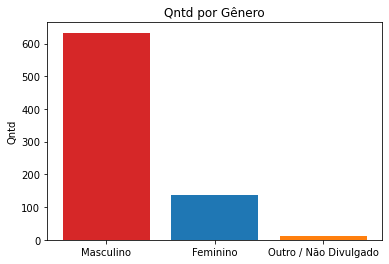

In [124]:
#Tipo de plot
fig, ax = mlp.subplots()

#dados do plot
gen = ['Masculino','Feminino','Outro / Não Divulgado']
counts = sexo["Total"]
bar_colors = ['tab:red', 'tab:blue','tab:orange']

#eixo x
ax.bar(gen, counts, color=bar_colors)

#eixo y
ax.set_ylabel('Qntd')

#título
ax.set_title('Qntd por Gênero')

#show
mlp.show()

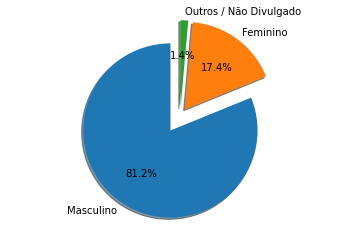

In [130]:
#plot das porcentagens

labels = 'Masculino', 'Feminino', 'Outros / Não Divulgado'
sizes = sexo["Total"]
explode = (0.2, 0.1, 0.1)  

fig1, ax1 = mlp.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

mlp.show()

## Informações Demográficas Por Gênero

In [ ]:
# Implemente aqui sua solução

## Análise de Compras Por Gênero

In [ ]:
# Implemente aqui sua solução

## Consumidores Mais Populares (Top 5)

In [ ]:
# Implemente aqui sua solução

## Itens Mais Populares

In [ ]:
# Implemente aqui sua solução

## Itens Mais Lucrativos

In [ ]:
# Implemente aqui sua solução